In [59]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
# def string_to_list(s):
#     if pd.isna(s):
#         return None
#     return [item.strip() for item in s.strip('[]').replace("'", "").split(',') if item]

def string_to_list(s):
    if (pd.isna(s)) or (s==''):
        return np.nan 
    
    # Use ast.literal_eval to safely evaluate string representations of lists
    try:
        parsed_list = ast.literal_eval(s)
    except (ValueError, SyntaxError):
        # Fallback in case of any parsing errors
        parsed_list = s.strip('[]').split(',')

    # Strip any extra whitespace and quotes
    return [item.strip().strip('"').strip("'") for item in parsed_list]


In [91]:
df = pd.read_csv('../Input/books_data.csv',
                       converters={
    'authors': string_to_list,
    'categories': string_to_list}
    )

# df['authors_list'] = df['authors'].apply(string_to_list)
# df['categories_list'] = df['categories'].apply(string_to_list)
# df =  df[sorted(df.columns)]
print('shape: ',df.shape)
df.head()

shape:  (212404, 10)


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,[Julie Strain],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[Comics & Graphic Novels],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,[Philip Nel],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[Biography & Autobiography],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,[David R. Ray],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[Religion],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,[Veronica Haddon],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[Fiction],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,[Edward Long],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [43]:
df.dtypes

Title             object
description       object
authors           object
image             object
previewLink       object
publisher         object
publishedDate     object
infoLink          object
categories        object
ratingsCount     float64
dtype: object

# 1. Missing Data Analysis

In [6]:
df.describe(include='object')

In [89]:
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100

# Create a dataframe to better visualize missing data
missing_data_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_data_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display missing data summary
print("Missing Data Analysis:")
print(missing_data_df)

Missing Data Analysis:
               Missing Values  Percentage
ratingsCount           162652   76.576712
publisher               75886   35.727199
description             68442   32.222557
image                   52075   24.516958
categories              41199   19.396527
authors                 31413   14.789270
publishedDate           25305   11.913617
previewLink             23836   11.222011
infoLink                23836   11.222011
Title                       1    0.000471


# 2. Duplicate Records

In [45]:
duplicate_records = df.duplicated(subset='Title', keep=False)
duplicate_count = duplicate_records.sum()
# Display the number of duplicate records
print(f"\nNumber of duplicate records: {duplicate_count}")



Number of duplicate records: 0


# 3. Distribution


## ratingsCount

In [100]:
q1 = df['ratingsCount'].quantile(0.25)
q3 = df['ratingsCount'].quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['ratingsCount'] < lower_bound) | (df['ratingsCount'] > upper_bound)]

# Calculate mean and median
count = df['ratingsCount'].sum()
mean = df['ratingsCount'].mean()
median = df['ratingsCount'].median()

# Print the results
print(f"Sum ratingsCount: {int(count)}")
print(f"Mean of ratingsCount: {mean.round(2)}")
print(f"Median of ratingsCount: {median}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"Number of outliers: {len(outliers)}")

Sum ratingsCount: 1057378
Mean of ratingsCount: 21.25
Median of ratingsCount: 2.0
Q1 (25th percentile): 1.0
Q3 (75th percentile): 5.0
Number of outliers: 6162


## authors

In [92]:
# Exploding the authors list to handle multiple authors per book
df_authors = df.explode('authors')

# Counting the number of books per author
author_counts = df_authors['authors'].value_counts()

# Display the top 10 authors
print("Top 10 Authors by Number of Books:")
print(author_counts.head(20))


Top 10 Authors by Number of Books:
authors
Rose Arny                                236
William Shakespeare                      228
Library of Congress. Copyright Office    178
Agatha Christie                          148
Erle Stanley Gardner                     128
Louis L'Amour                            125
Charles Dickens                          108
Isaac Asimov                              96
Mark Twain                                90
Edgar Rice Burroughs                      89
Rudyard Kipling                           87
Francine Pascal                           84
Various                                   78
Library of Congress                       77
Zane Grey                                 77
Lonely Planet                             75
Robert Louis Stevenson                    74
Ann M. Martin                             74
Henry James                               71
Carolyn Keene                             71
Name: count, dtype: int64


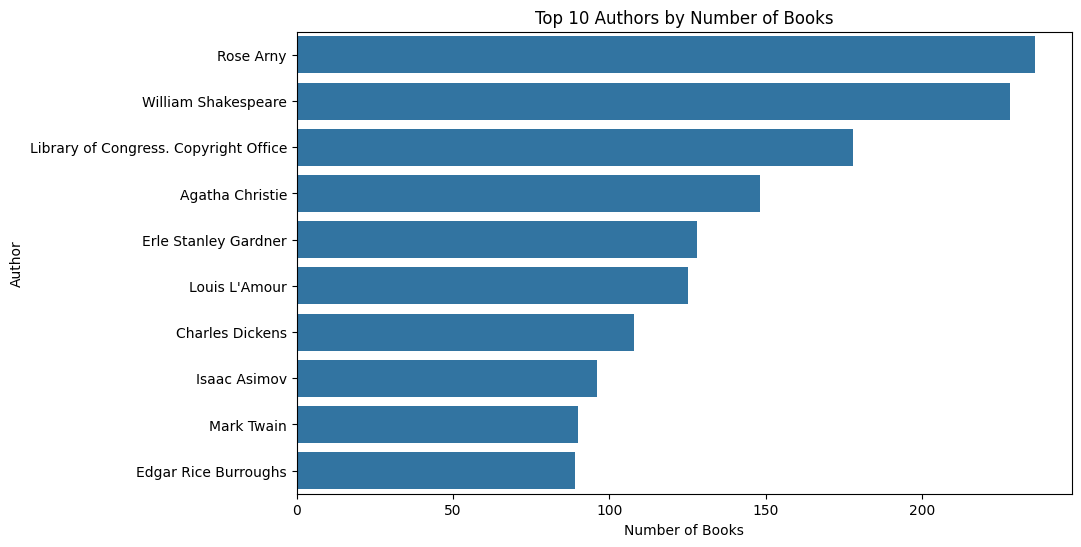

In [94]:
# Top 10 Authors Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts.head(10).values, y=author_counts.head(10).index)
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

# categories

In [95]:
# Exploding the categories list to handle multiple categories per book
df_categories = df.explode('categories')

# Counting the number of books per category
category_counts = df_categories['categories'].value_counts()

# Display the top 10 categories
print("\nTop 10 Categories by Number of Books:")
print(category_counts.head(20))



Top 10 Categories by Number of Books:
categories
Fiction                        23419
Religion                        9459
History                         9330
Juvenile Fiction                6643
Biography & Autobiography       6324
Business & Economics            5625
Computers                       4312
Social Science                  3834
Juvenile Nonfiction             3446
Science                         2623
Education                       2611
Cooking                         2445
Sports & Recreation             2267
Family & Relationships          2178
Literary Criticism              2147
Music                           2106
Medical                         2079
Art                             2054
Body, Mind & Spirit             2049
Language Arts & Disciplines     2036
Name: count, dtype: int64


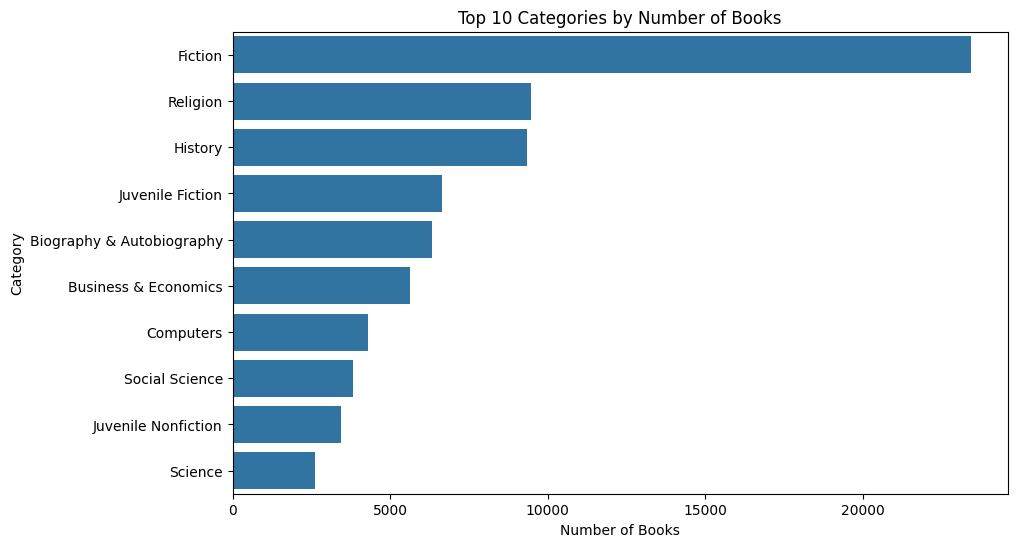

In [96]:
# Top 10 Categories Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.head(10).values, y=category_counts.head(10).index)
plt.title('Top 10 Categories by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.show()